In [5]:
include("GP.jl");
using PyPlot

$f_t(u,\lambda) = \lambda\tanh(u)$

$\lambda(t) = 1 + \sin(\omega t)$

In [39]:
𝑓ₜ(𝑢,𝜆) = tanh.(𝜆*𝑢)
𝜆(𝑡) = 1. + sin.(ω.*𝑡)

𝑛ₜ = 100
ω  = 8π
𝑛ᵤ = 25

𝐭 = linspace(0.,1.,𝑛ₜ)
𝐮 = linspace(-10.,10.,500)

-10.0:0.04008016032064128:10.0

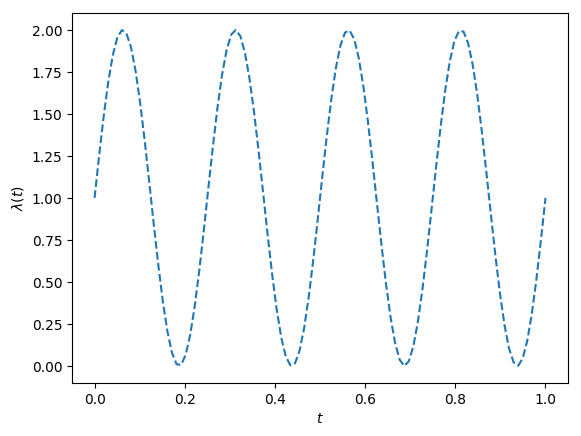

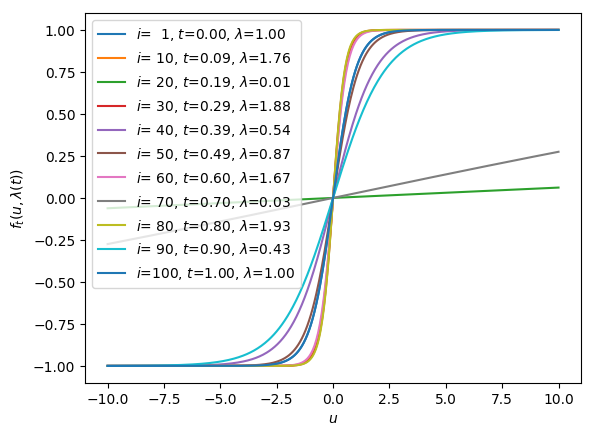

BoundsError: [91mBoundsError: attempt to access "𝑄 = 0.1^2\nuₜ, 𝐲, 𝑡ᵢ = sample(𝐮,𝐟ₜ,𝜎²=𝑄)\n\nfor \\in𝑡ᵢ"
  at index [84][39m

In [59]:
plot(𝐭,𝜆(𝐭),"--")
xlabel(L"$t$")
ylabel(L"$\lambda(t)$")

𝐟ₜ = [𝑓ₜ(𝐮,𝜆(𝑡)) for 𝑡 ∈ 𝐭]
lbl = []
figure()
for 𝑖 ∈ [1;10:10:𝑛ₜ]
    plot(𝐮, 𝐟ₜ[𝑖])
    txt = @sprintf "%s=%3d, %s=%4.2f, %s=%4.2f" L"$i$" 𝑖 L"$t$" 𝐭[𝑖] L"$\lambda$" 𝜆(𝐭[𝑖])
    push!(lbl,txt)
end
xlabel(L"$u$")
ylabel(L"$f_t(u,\lambda(t))$")
legend(labels=lbl)
; #suppress text output

In [56]:
function sample(𝐮,𝐟ₜ;𝜎²=1e-10,𝑠ₜ=10,𝑠ᵤ=5)
    𝑛ₜ = length(𝐟ₜ)
    𝑡ᵢ = round.(Int,linspace(1,𝑛ₜ,𝑠ₜ))
    
    𝐟ᵢ = 𝐟ₜ[𝑡ᵢ]
    
    uₜ = [rand(1:floor(Int,𝑛ₜ),𝑠ᵤ) for _ ∈ 1:𝑠ₜ]
    𝐲 = [𝐟ᵢ[𝑡][uₜ[𝑡]] + sqrt.(𝜎²)*randn() for 𝑡 ∈ 1:𝑠ₜ]
    
    return uₜ, 𝐲, 𝑡ᵢ
end

sample (generic function with 1 method)

In [62]:
𝑄 = 0.1^2
uₜ, 𝐲, 𝑡ᵢ = sample(𝐮,𝐟ₜ,𝜎²=𝑄)

for 𝑖 ∈ 𝑡ᵢ
    gp_predict = trained_gp(uₜ[𝑖],𝐲[𝑖],σ²=𝑄)
    
    μ,Σ = gp_predict(𝐮)
    
    
    figure()
    plot(𝐮, 𝐟ₜ[𝑖],"-",uₜ[𝑖],𝐲[𝑖],".")
    
    plot(𝐮, μ, "--")
    fill_between(𝐮,
                 μ - 1.96*sqrt.(diag(Σ)), 
                 μ + 1.96*sqrt.(diag(Σ)), alpha=0.5)
end

LoadError: [91mBoundsError: attempt to access 10-element Array{Array{Int64,1},1} at index [12][39m

10-element Array{Int64,1}:
   1
  12
  23
  34
  45
  56
  67
  78
  89
 100